# TDMS Reader for Julia

Author(s): *Martin Fränzl*

IMPORTANT: The TDMSReader package supports TDMS version 2.0 only.

In [180]:
using TDMSReader

function analyzeTDMS(file)
    # Print properties and channels of TDMS file
    tdms_file = TDMSReader.readtdms(file)
    println("Properties (Root):")
    for (name, value) in tdms_file.props
        println("  ", "$name: $value")
    end
    for (group_name, group) in tdms_file.groups
        println("\"", group_name, "\"")
        println("  Properties (\"", group_name, "\")")
        for (name, value) in group.props
            println("  ", "$prop_key: $prop")
        end
        for (channel_name, channel) in group.channels
            println("  ", channel_name)
        end
    end
end;

function loadTDMS_Video(file)
    tdms_file = TDMSReader.readtdms(file)
    props = tdms_file.props
    p = Dict(
        "dimx" => parse(Int, props["dimx"]),
        "dimy" => parse(Int, props["dimy"]),
        "frames" => parse(Int, props["dimz"]),
        "binning" => parse(Int, props["binning"]),
        "exposure_time" => parse(Float64, props["exposure"]),
        #"framerate" => parse(Float64, props["framerate"]),
    )
    images = permutedims(reshape(tdms_file["Image"]["Image"].data, p["dimx"], p["dimy"], p["frames"]), [3, 2, 1])
    return images, p
end;

In [181]:
#permutedims(images, [2, 3, 1])

In [182]:
#analyzeTDMS("72/Data/Martin/TDMS_Tests/Set_001_video.tdms")

In [183]:
images, p = loadTDMS_Video("72/Data/Martin/TDMS_Tests/Set_001_video.tdms");

In [184]:
size(images)

(1000, 512, 512)

In [185]:
size(images[1,:,:])

(512, 512)

In [177]:
using ImageView

In [186]:
#using Colors

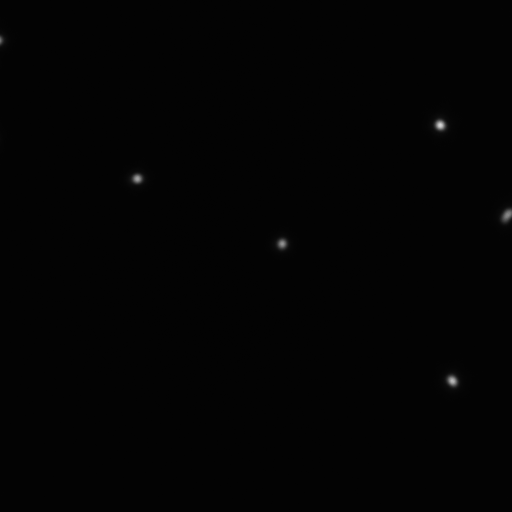

In [187]:
Gray.(images[1,:,:]/maximum(images))